In [47]:
import numpy as np
import math
from scipy.optimize import minimize
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [24]:
''' The dataset is about admision in the university based on the scores of two courese'''

def load_admitted_university_dataset(filename='dataset/admitted_to_a_university.txt', delimiter=','):
        
        data = np.genfromtxt(filename, delimiter=',')
        x, y = data[:, 0:2], data[:, 2]
        return x, y

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


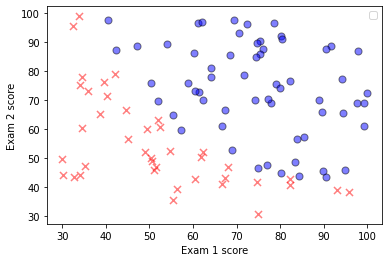

In [31]:
'''visulized_data'''
X,y=load_admitted_university_dataset(filename='dataset/admitted_to_a_university.txt', delimiter=',')

alpha=0.5
neg = X[y == 0]
pos = X[y == 1]


plt.scatter(neg[:, 0], neg[:, 1], s=50, c='r', marker='x', alpha=alpha )
plt.scatter(pos[:, 0], pos[:, 1], s=50, c='b', marker='o', alpha=alpha, edgecolors='k')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend()
plt.show()

In [32]:
def feature_normalize(X):
    """A vectorized implementation of feature normalization.
    Arguments:
    - X: The raw input features, a 2d array of shape (m, n)
        
    Outputs:
    - X_norm: The normalized version of the input matrix
    - mu: The mean of the features
    - sigma: The std dev of the features  
    befor transformaton :
    we put axis=0 because we are going to calulate mean and std on colums not rows"""
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    
    return X_scaled

In [50]:
def sigmoid(X, theta):
    """ Hypothesis function for linear regression.
    
    Arguments:
        - X: Input matrix, a 2d array of shape (m, n+1)
        - theta: parameters, a 2d array of shape (n+1, 1)
        
    Output:
        - Predictions for input data (m-by-1), (100, 1) <class 'numpy.ndarray'>
    """
    
    z=X@theta
    return 1/(1+ np.exp(-z))

In [107]:
def logistic_regression_cost(theta, X, y,reg):
    """ Vectorized implementation of logistic regression cost function.
    
    Parameters:
        - theta: Parameters, a 1d array of shape (n + 1,)
        - X: Inputs, a 2d array of shape (m, n + 1)
        - y: Target values, a 1d array of shape (m,)
        
    Returns:
        - logistic regression cost
    """
    m, n = X.shape
    K0=sigmoid(X, theta)
    M0=1-sigmoid(X,theta)
    for i in range(m):
        if y[i]==1:
            M0[i]=1
        else:
            K0[i]=1    
    M=np.log(M0)
    K=np.log(K0)
    L=(-K.T@ y )-(M.T@(1-y))
    R=(reg/2)*(theta @theta.T)
    return  (1/m) *L +R
    

In [113]:

def grads(theta, X, y,alpha, num_iterations):
    """ Vectorized implementation of the gradient of logistic regression cost function.
    
    Parameters:
        - theta: Parameters, a 1d array of shape (n + 1,)
        - X: Inputs, a 2d array of shape (m, n + 1)
        - y: Target values, a 2d array of shape (m,)
        
    Returns:
        - gradient of the logistic regression cost function, a 2d array of shape (n + 1,)
    """
    m, n = X.shape
    
    for iteration in range(num_iterations):
        
        '''print cost every 100 iterations'''
        if iteration % 100 == 0:
            print('%4d: J(%s) = %.2f' %(iteration, theta, 
            logistic_regression_cost(theta, X, y,reg)))
          
        # compute gradients
        M=sigmoid(X, theta)-y
        grads=X.T @ M
        theta=theta-(grads*(alpha/m))
        # update parameters  
    return theta


In [109]:
def predict(theta, X):
    probabilities = sigmoid(X, theta)
    y_pred = [0 if p < 0.5 else 1 for p in probabilities]
    return y_pred

def accuracy(y_pred, y_true):
    return 100. * np.sum(y_pred == y_true) / len(y_true) 

In [114]:

X_scaled=feature_normalize(X)
m, n = X_scaled.shape
X_scaled = np.c_[np.ones((m, 1)), X_scaled].reshape((m, n+1))
#X_scaled[:,0] = np.ones((m,))


In [122]:
''' computing minimum by grads'''

theta = np.zeros((3,))
num_iterations=5000
alpha=0.005
reg = 0.001
theta_grads=grads(theta, X_scaled, y,alpha, num_iterations)

   0: J([0. 0. 0.]) = 0.69
 100: J([0.04703929 0.13245303 0.11824749]) = 0.63
 200: J([0.08866903 0.24992838 0.22318998]) = 0.57
 300: J([0.12574254 0.35466626 0.31680574]) = 0.53
 400: J([0.15902904 0.44868762 0.40088306]) = 0.50
 500: J([0.18917716 0.53370865 0.47694453]) = 0.47
 600: J([0.21671596 0.61114374 0.5462484 ]) = 0.45
 700: J([0.24207074 0.68214407 0.60982125]) = 0.43
 800: J([0.26558204 0.747644   0.668498  ]) = 0.41
 900: J([0.28752307 0.80840403 0.72295925]) = 0.40
1000: J([0.30811419 0.86504674 0.7737627 ]) = 0.38
1100: J([0.32753438 0.91808549 0.82136845]) = 0.37
1200: J([0.34593015 0.96794697 0.86615887]) = 0.36
1300: J([0.36342243 1.01498864 0.90845416]) = 0.35
1400: J([0.38011186 1.05951236 0.94852449]) = 0.35
1500: J([0.39608284 1.10177494 0.98659944]) = 0.34
1600: J([0.41140675 1.14199643 1.02287546]) = 0.33
1700: J([0.42614434 1.18036669 1.05752174]) = 0.33
1800: J([0.44034775 1.21705052 1.09068492]) = 0.32
1900: J([0.45406197 1.25219184 1.12249277]) = 0.32
2000

In [127]:
print('cost= {:.2f}'.format(logistic_regression_cost(theta_grads, X_scaled, y, reg)))
print('The best parametrs =' %theta_grads)
print(theta_grads)

predictions = predict(theta_grads, X_scaled)
acc = accuracy(predictions, y)
print('accuracy = {:.2f}%'.format(acc))

cost= 0.25
The best parametrs =
[0.74702473 1.942721   1.75815128]
accuracy = 90.00%


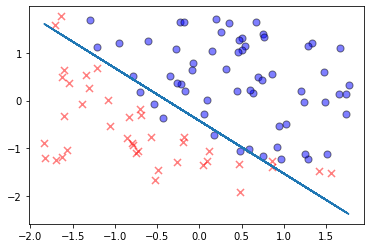

In [126]:
""" We draw a linear decision boundary.
    This bound is linear
"""

alpha=0.5
neg = X_scaled[y == 0]
pos = X_scaled[y == 1]


plt.scatter(neg[:, 1], neg[:, 2], s=50, c='r', marker='x', alpha=alpha )
plt.scatter(pos[:, 1], pos[:, 2], s=50, c='b', marker='o', alpha=alpha, edgecolors='k')
plt.plot(X_scaled[:, 1], -(theta_grads[0]+theta_grads[1]*X_scaled[:, 1])/theta_grads[2])

plt.show()

In [123]:

# optimize cost function to find the optimal parameters   
from scipy.optimize import minimize

result = minimize(
    logistic_regression_cost, 
    x0=theta, 
    args=(X_scaled, y.ravel(), reg), 
    method='CG')
print(result)


     fun: 0.21770380226151853
     jac: array([ 2.23517418e-08, -5.96046448e-08,  4.65661287e-08])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 10
    njev: 33
  status: 0
 success: True
       x: array([1.48740184, 3.49767712, 3.2476717 ])


In [124]:
# compute accuracy
theta_opt=result.x 
predictions = predict(theta_opt, X_scaled)
acc = accuracy(predictions, y)
print('accuracy = {:.2f}%'.format(acc))

accuracy = 89.00%
